In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import OneClassSVM
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from sklearn.feature_selection import VarianceThreshold


In [2]:
X_train_undersampled = pd.read_csv('data/BitcoinX_ut_d3.csv')

y_train_undersampled = pd.read_csv('data/BitcoinY_ut_d3.csv')
y_train_undersampled = y_train_undersampled.label
y_test = pd.read_csv('data/BitcoinY_test_d3.csv')

X_test = pd.read_csv('data/BitcoinX_test_d3.csv')


y_test = y_test.label


X_test = pd.DataFrame(X_test)
X_train_undersampled = pd.DataFrame(X_train_undersampled)


In [3]:
BOOST = XGBClassifier(gamma = 1,max_depth=30, learning_rate=0.5, objective='binary:logistic',n_jobs = 19)

In [4]:
BOOST.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=19,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
yhat = BOOST.predict(X_test)

yhat_train = BOOST.predict(X_train_undersampled)

In [6]:

print("\nAccuracy Score for Testing:", accuracy_score(y_test,yhat))

print("\nAccuracy Score for Training:", accuracy_score(y_train_undersampled,yhat_train))

print('\nClassification Report for Testing:\n', classification_report(y_test,yhat))

print('\nClassification Report for Training:\n', classification_report(y_train_undersampled,yhat_train))


Accuracy Score for Testing: 0.7308910755305653

Accuracy Score for Training: 0.8813352606378173

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84    575134
           1       0.04      0.73      0.07      8206

    accuracy                           0.73    583340
   macro avg       0.52      0.73      0.46    583340
weighted avg       0.98      0.73      0.83    583340


Classification Report for Training:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     33207
           1       0.89      0.88      0.88     33207

    accuracy                           0.88     66414
   macro avg       0.88      0.88      0.88     66414
weighted avg       0.88      0.88      0.88     66414



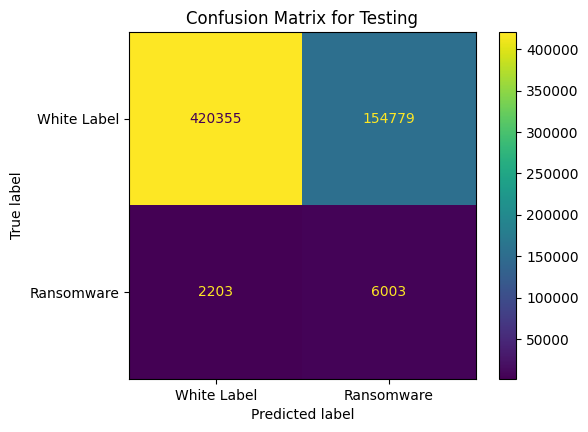

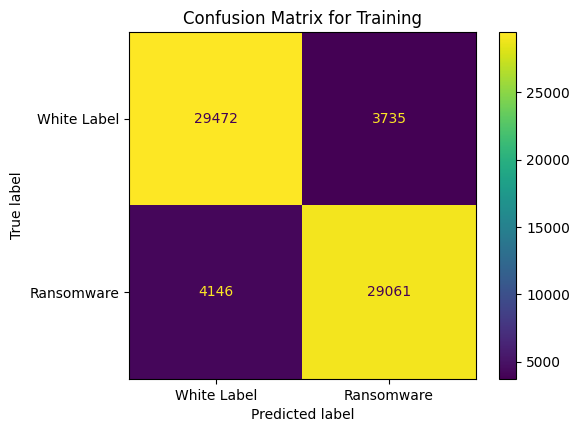

In [7]:
# myconfusionmatrix = confusion_matrix(y_test, yhat, labels=[0,1])

# mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=['White Label', 'Ransomware'])
# mycmdisp.plot()

# Testing Confusion Matrix
test_cm = confusion_matrix(y_test, yhat, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_undersampled,yhat_train, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Training')

plt.show()


# Decision Trees with XGBoost 

source: https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

In [8]:

Dtree = XGBClassifier(gamma = 4, num_parallel_tree = 300,max_depth=10, learning_rate=0.25, objective='binary:logistic',subsample = 0.8, colsample_bynode = 0.8, tree_method='hist',n_estimators = 300)

Dtree.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=300, random_state=None, ...)

In [9]:
yhat = Dtree.predict(X_test)

yhat_train = Dtree.predict(X_train_undersampled)

In [10]:

print("\nAccuracy Score for Testing:", accuracy_score(y_test,yhat))

print("\nAccuracy Score for Training:", accuracy_score(y_train_undersampled,yhat_train))

print('\nClassification Report for Testing:\n', classification_report(y_test,yhat, target_names=['White Label', 'Ransomware']))

print('\nClassification Report for Training:\n', classification_report(y_train_undersampled,yhat_train, target_names=['White Label', 'Ransomware']))


Accuracy Score for Testing: 0.745335481880207

Accuracy Score for Training: 0.7775167886289035

Classification Report for Testing:
               precision    recall  f1-score   support

 White Label       1.00      0.75      0.85    575134
  Ransomware       0.04      0.74      0.08      8206

    accuracy                           0.75    583340
   macro avg       0.52      0.74      0.46    583340
weighted avg       0.98      0.75      0.84    583340


Classification Report for Training:
               precision    recall  f1-score   support

 White Label       0.78      0.78      0.78     33207
  Ransomware       0.78      0.78      0.78     33207

    accuracy                           0.78     66414
   macro avg       0.78      0.78      0.78     66414
weighted avg       0.78      0.78      0.78     66414



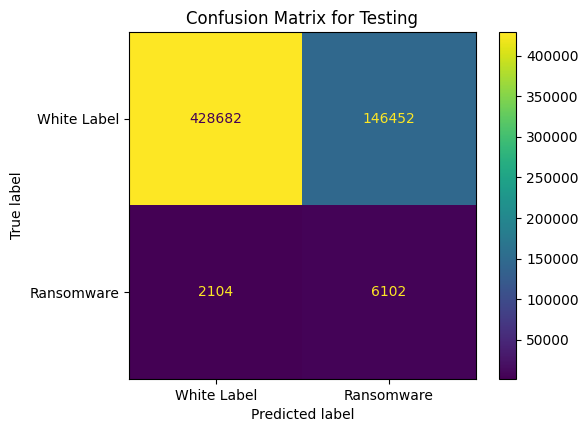

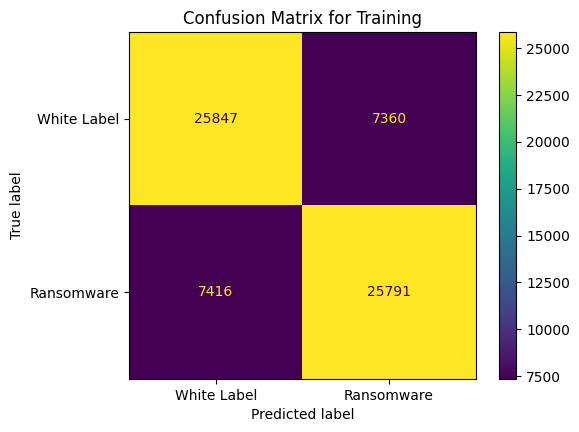

In [11]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test, yhat, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_undersampled,yhat_train, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Training')

plt.show()


# Trying different Parameters to find better accuracy and reduce overfitting

Model 1

In [12]:
Xboost1 = XGBClassifier(gamma = 5, num_parallel_tree = 100,max_depth=10, learning_rate=0.1, objective='binary:logistic',subsample = 0.8, colsample_bynode = 0.8, tree_method='hist',n_estimators = 300)

Xboost1.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=100, random_state=None, ...)

In [13]:
yhat = Xboost1.predict(X_test)

yhat_train = Xboost1.predict(X_train_undersampled)

In [14]:

print("\nAccuracy Score for Testing:", accuracy_score(y_test,yhat))

print("\nAccuracy Score for Training:", accuracy_score(y_train_undersampled,yhat_train))

print('\nClassification Report for Testing:\n', classification_report(y_test,yhat, target_names=['White Label', 'Ransomware']))

print('\nClassification Report for Training:\n', classification_report(y_train_undersampled,yhat_train, target_names=['White Label', 'Ransomware']))


Accuracy Score for Testing: 0.7426543696643467

Accuracy Score for Training: 0.7701689402836751

Classification Report for Testing:
               precision    recall  f1-score   support

 White Label       1.00      0.74      0.85    575134
  Ransomware       0.04      0.74      0.08      8206

    accuracy                           0.74    583340
   macro avg       0.52      0.74      0.46    583340
weighted avg       0.98      0.74      0.84    583340


Classification Report for Training:
               precision    recall  f1-score   support

 White Label       0.77      0.77      0.77     33207
  Ransomware       0.77      0.77      0.77     33207

    accuracy                           0.77     66414
   macro avg       0.77      0.77      0.77     66414
weighted avg       0.77      0.77      0.77     66414



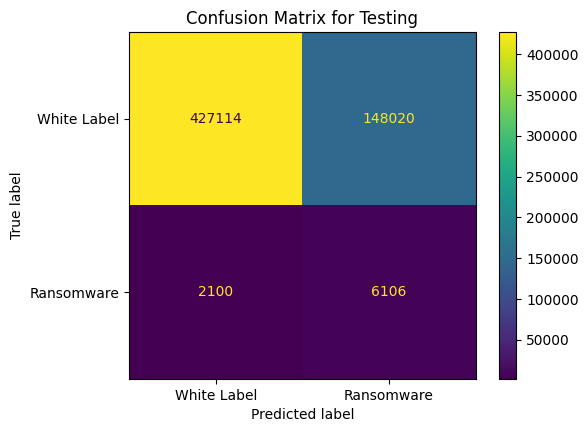

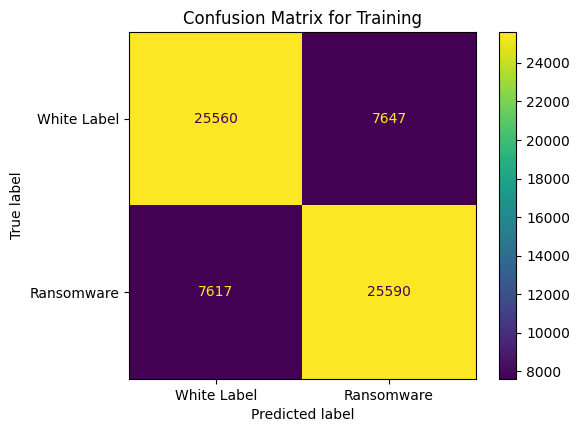

In [16]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test, yhat, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_undersampled,yhat_train, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Training')

plt.show()


Model 2

In [17]:
Xboost2 = XGBClassifier(gamma = 5, num_parallel_tree = 100,max_depth=10, learning_rate=0.1, objective='binary:logistic',subsample = 0.8, colsample_bynode = 0.8, tree_method='hist',n_estimators = 1)

Xboost2.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=100, random_state=None, ...)

In [18]:
yhat = Xboost2.predict(X_test)

yhat_train = Xboost2.predict(X_train_undersampled)

In [19]:

print("\nAccuracy Score for Testing:", accuracy_score(y_test,yhat))

print("\nAccuracy Score for Training:", accuracy_score(y_train_undersampled,yhat_train))

print('\nClassification Report for Testing:\n', classification_report(y_test,yhat, target_names=['White Label', 'Ransomware']))

print('\nClassification Report for Training:\n', classification_report(y_train_undersampled,yhat_train, target_names=['White Label', 'Ransomware']))


Accuracy Score for Testing: 0.7303545102341688

Accuracy Score for Training: 0.7539374228325353

Classification Report for Testing:
               precision    recall  f1-score   support

 White Label       0.99      0.73      0.84    575134
  Ransomware       0.04      0.73      0.07      8206

    accuracy                           0.73    583340
   macro avg       0.52      0.73      0.46    583340
weighted avg       0.98      0.73      0.83    583340


Classification Report for Training:
               precision    recall  f1-score   support

 White Label       0.76      0.75      0.75     33207
  Ransomware       0.75      0.76      0.75     33207

    accuracy                           0.75     66414
   macro avg       0.75      0.75      0.75     66414
weighted avg       0.75      0.75      0.75     66414



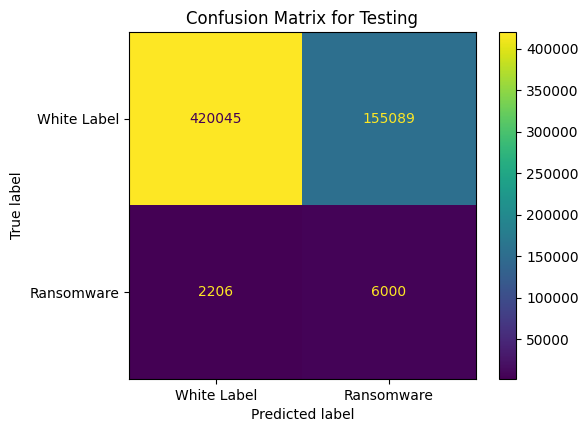

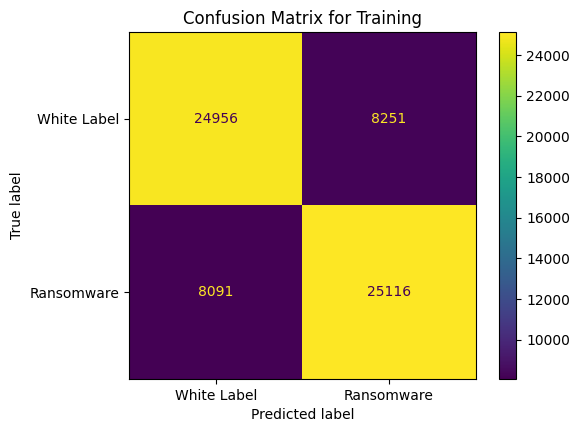

In [21]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test, yhat, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_undersampled,yhat_train, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Training')

plt.show()


# Tuning Decision Trees with Sklearn Gridsearch to further reduce overfitting and Increase accuracy

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'max_depth': [10,15],
    'gamma': [2,5],
    'num_parallel_tree': [100,300,50],

}

GridSearchModel = XGBClassifier(objective='binary:logistic',colsample_bynode = 0.75,tree_method = 'hist',n_estimators = 100, learning_rate = 1,subsample = 0.8)


grid_search = GridSearchCV(GridSearchModel, param_grid, cv=3, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_undersampled, y_train_undersampled)


print("Best set of hyperparameters: ", grid_search.best_params_)


Best set of hyperparameters:  {'gamma': 2, 'max_depth': 10, 'num_parallel_tree': 50}


Model 3

In [24]:
Xboost3 = XGBClassifier(gamma = 2, num_parallel_tree = 50,max_depth=10, learning_rate=1, objective='binary:logistic',subsample = 0.8, colsample_bynode = 0.8, tree_method='hist',n_estimators = 300)

Xboost3.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=50, random_state=None, ...)

In [25]:
yhat = Xboost3.predict(X_test)

yhat_train = Xboost3.predict(X_train_undersampled)

In [26]:

print("\nAccuracy Score for Testing:", accuracy_score(y_test,yhat))

print("\nAccuracy Score for Training:", accuracy_score(y_train_undersampled,yhat_train))

print('\nClassification Report for Testing:\n', classification_report(y_test,yhat, target_names=['White Label', 'Ransomware']))

print('\nClassification Report for Training:\n', classification_report(y_train_undersampled,yhat_train, target_names=['White Label', 'Ransomware']))


Accuracy Score for Testing: 0.7511862721568896

Accuracy Score for Training: 0.827747161743006

Classification Report for Testing:
               precision    recall  f1-score   support

 White Label       1.00      0.75      0.86    575134
  Ransomware       0.04      0.74      0.08      8206

    accuracy                           0.75    583340
   macro avg       0.52      0.75      0.47    583340
weighted avg       0.98      0.75      0.85    583340


Classification Report for Training:
               precision    recall  f1-score   support

 White Label       0.82      0.84      0.83     33207
  Ransomware       0.83      0.82      0.83     33207

    accuracy                           0.83     66414
   macro avg       0.83      0.83      0.83     66414
weighted avg       0.83      0.83      0.83     66414



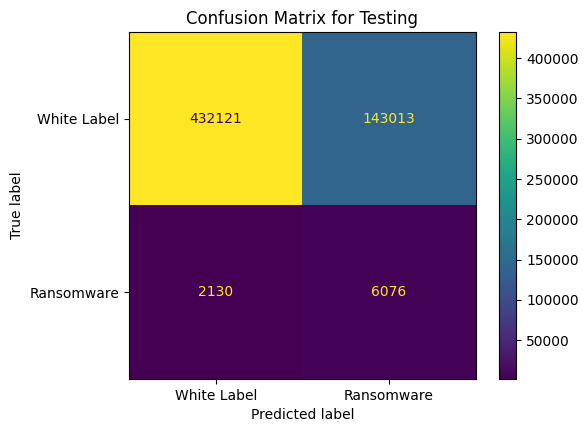

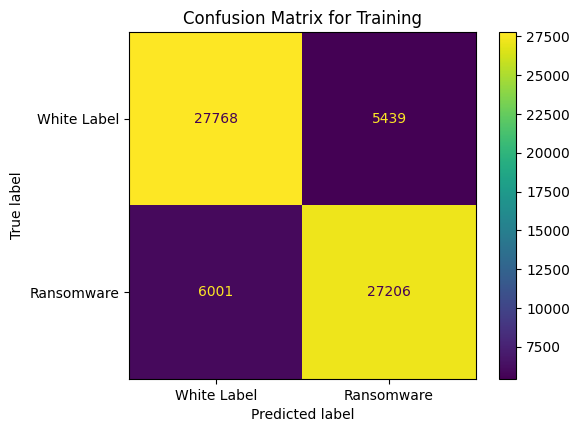

In [27]:
# Testing Confusion Matrix
test_cm = confusion_matrix(y_test, yhat, labels=[0,1])
test_dcm = ConfusionMatrixDisplay(test_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
test_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Testing')

# Training Confusion Matrix
train_cm = confusion_matrix(y_train_undersampled,yhat_train, labels=[0,1])
train_dcm = ConfusionMatrixDisplay(train_cm, display_labels=['White Label', 'Ransomware'])
fig, ax = plt.subplots(figsize=(6, 4.5))
train_dcm.plot(ax=ax)
ax.set_title('Confusion Matrix for Training')

plt.show()
